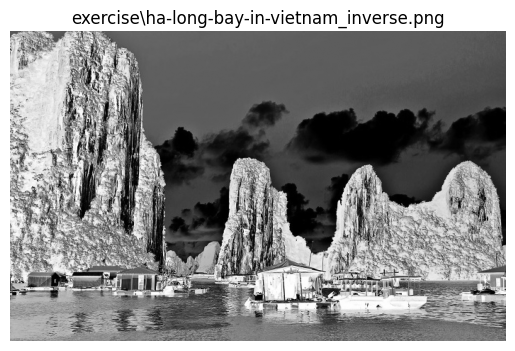

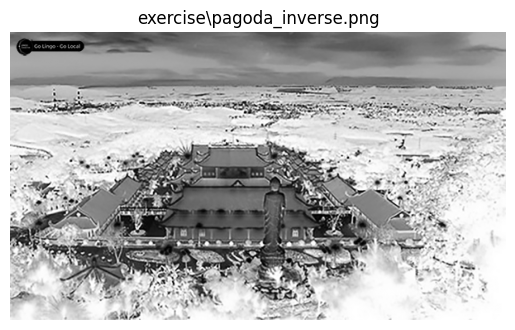

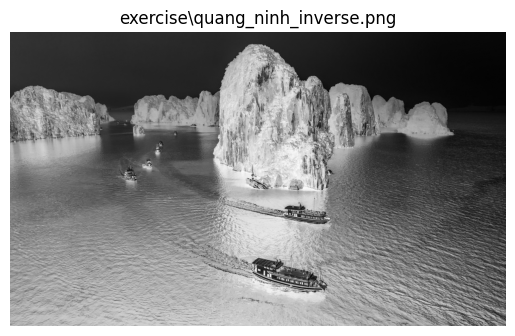

In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

def inverse_transform(img):
    return 255 - img

def gamma_correction(img, gamma=0.5):
    img_float = img.astype(float)
    img_norm = img_float / 255.0
    corrected = np.power(img_norm, gamma)
    return np.uint8(corrected * 255)

def log_transform(img):
    img_float = img.astype(float)
    c = 255 / np.log(1 + np.max(img_float))
    log_img = c * np.log(1 + img_float)
    return np.uint8(log_img)

def histogram_equalization(img):
    return cv2.equalizeHist(img)

def contrast_stretching(img):
    a = np.min(img)
    b = np.max(img)
    stretched = 255 * (img - a) / (b - a)
    return np.uint8(stretched)

def show_and_save(img, filename):
    cv2.imwrite(filename, img)
    plt.imshow(img)
    plt.title(filename)
    plt.axis('off')
    plt.show()

def main():
    folder = 'exercise'
    choice = input("Enter I, G, L, H, or C: ").upper()

    for fname in os.listdir(folder):
        if fname.endswith('.jpg') or fname.endswith('.png'):
            path = os.path.join(folder, fname)
            img = Image.open(path).convert('L')
            img_np = np.array(img)

            if choice == 'I':
                result = inverse_transform(img_np)
                suffix = '_inverse'
            elif choice == 'G':
                result = gamma_correction(img_np)
                suffix = '_gamma'
            elif choice == 'L':
                result = log_transform(img_np)
                suffix = '_log'
            elif choice == 'H':
                result = histogram_equalization(img_np)
                suffix = '_hist'
            elif choice == 'C':
                result = contrast_stretching(img_np)
                suffix = '_stretch'
            else:
                print("Invalid choice")
                return

            output_name = os.path.splitext(fname)[0] + suffix + '.png'
            output_path = os.path.join(folder, output_name)
            show_and_save(result, output_path)

if __name__ == '__main__':
    main()
